In [238]:
import coin
import importlib
import pandas as pd
import logging
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import traceback

In [235]:
logging.basicConfig(
    format="[%(levelname)s]%(asctime)s %(message)s", 
    datefmt="%Y-%m-%d %H:%M:%S",
    filename="coin.log",
    level=logging.DEBUG
)

In [226]:
n_sample = int(1e3)
Wobs = 12 * 1000

mb, sb = 10, 5   # 重さの観測誤差の事前分布の期待値・標準偏差
mmu, smu = 300, 500  # 投入回数の事前分布の期待値・標準偏差
sb_, smu_ = 10, 10 # 提案分布の標準偏差

mu_i = 200        # Tの事前分布の平均
T_i = 200         # 投入回数
M_i = [200] * T_i # 各投入の金額
beta_i = 1        # 重さの観測の標準偏差

In [242]:
importlib.reload(coin)
try:
    samples, lls, proposed = coin.run(
        n_sample,
        Wobs,
        [mb, sb, mmu, smu, sb_, smu_],
        coin.Coin.Param(mu_i, T_i, M_i, beta_i),
        coin.Coin,
        seed = 3
    )
except coin.McmcException as e:
    samples, lls, proposed = e.ret
    traceback.print_exec()

100-th step begins: 0.9324188232421875


AttributeError: module 'traceback' has no attribute 'print_exec'

In [243]:
df = pd.DataFrame(dict(
    Ts = [p.T for p in samples],
    mus = [p.mu for p in samples],
    betas = [p.beta for p in samples],
    lls = lls
))
df.tail(1)

,Ts,mus,betas,lls
106,6,96.435382,231.451651,-249.084497


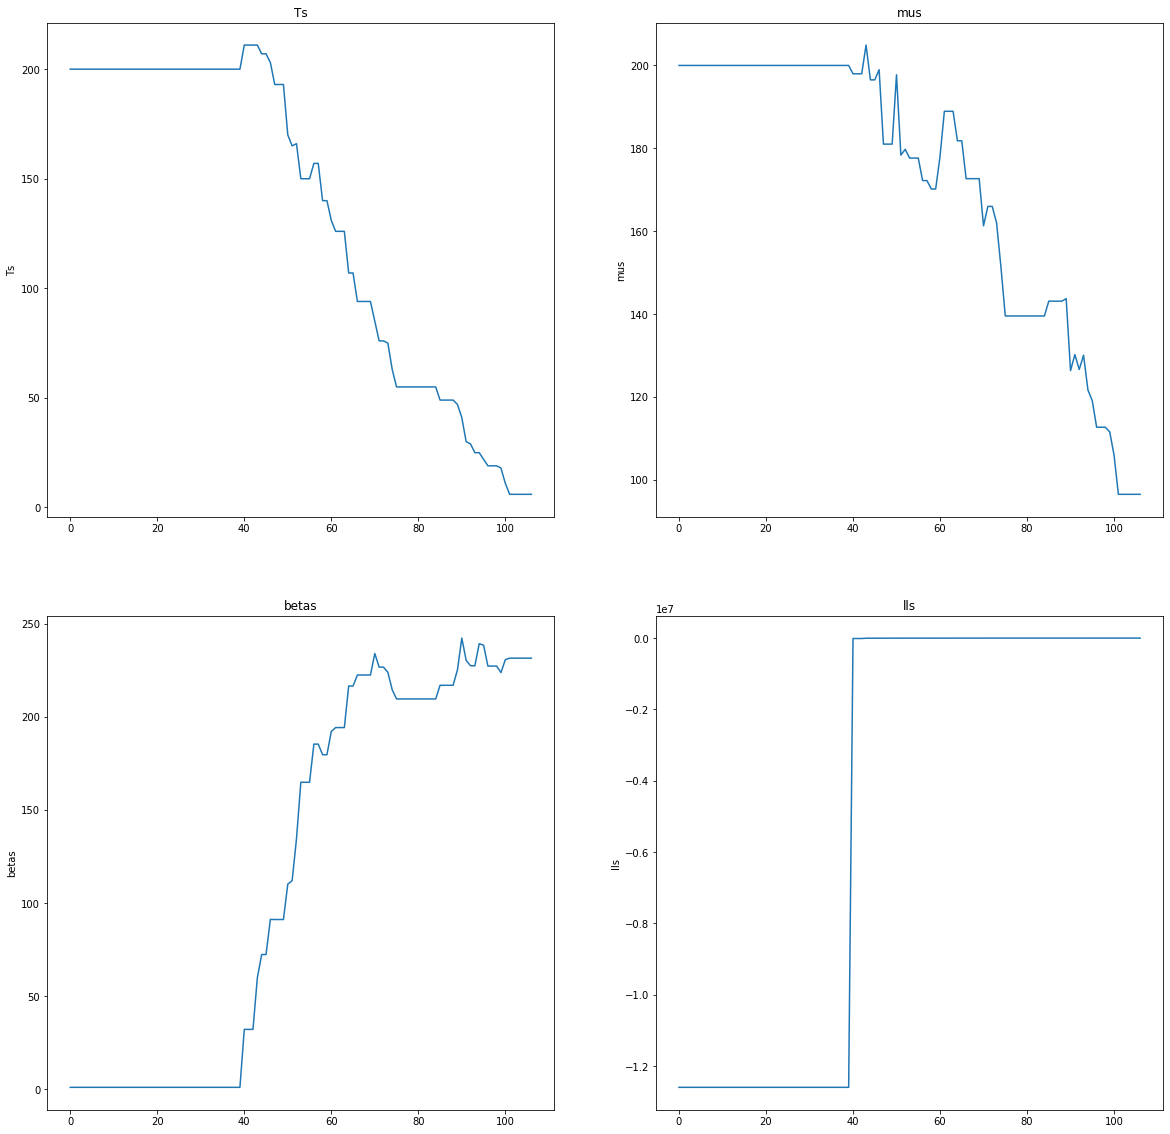

In [244]:
fig = plt.figure(figsize=(20,20))
for i, c in enumerate(df.columns):
    ax = fig.add_subplot(2, 2, i+1)
    sns.lineplot(range(len(df)), df[c])
    ax.set_title(c)